In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)   # one hot encoding to categorical col.

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.shape

(8000, 11)

In [14]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.fit(X_test)

In [17]:
!pip install tensorflow

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))   # Hidden layer 1
model.add(Dense(11,activation='relu'))     # hidden layer 2
model.add(Dense(1,activation='sigmoid'))  # output layer

C:\Users\skjha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])    # here optimizer = Adam is for gradient des.

In [22]:
history = model.fit(X_train_trf,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7730 - loss: 0.5534 - val_accuracy: 0.7975 - val_loss: 0.4759
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4579 - val_accuracy: 0.8006 - val_loss: 0.4452
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.4391 - val_accuracy: 0.8081 - val_loss: 0.4358
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4355 - val_accuracy: 0.8150 - val_loss: 0.4319
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.4180 - val_accuracy: 0.8213 - val_loss: 0.4252
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.4131 - val_accuracy: 0.8256 - val_loss: 0.4186
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.4185 - val_accuracy: 0.8281 - val_loss: 0.4129
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4114 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[ 2.52097636e-01,  1.67105496e-02,  3.22165430e-01,
         -4.34457898e-01, -4.52766530e-02,  9.11456067e-04,
         -8.86256099e-02, -2.57979542e-01,  5.32287359e-02,
         -8.69841257e-04,  3.17394920e-02],
        [-7.60193527e-01, -5.83105581e-03, -4.53954279e-01,
         -4.56992030e-01,  6.38860643e-01,  1.76993921e-01,
         -9.44989800e-01, -5.37701435e-02, -8.34238350e-01,
          9.57241118e-01, -1.99901089e-01],
        [-3.37260514e-01, -2.88636759e-02,  3.32478657e-02,
          1.15921222e-01,  2.46094950e-02, -6.04238510e-02,
          2.84963816e-01, -1.73252374e-01,  2.63913088e-02,
          1.57322899e-01, -8.97037461e-02],
        [ 2.10354567e-01, -1.70445517e-01, -3.39921027e-01,
          1.45853326e-01, -1.10708952e-01,  4.46099728e-01,
          2.41796941e-01, -4.81748134e-01,  9.06981062e-03,
         -2.10768774e-01, -1.24000594e-01],
        [-2.84842908e-01, -1.52200699e+00, -1.85110167e-01,
         -3.31194103e-02, -1.20668143e-01,  

In [24]:
model.layers[1].get_weights()

[array([[-2.81637877e-01,  3.32346618e-01,  2.32327297e-01,
         -1.94044888e-01, -4.09848839e-02, -8.30596328e-01,
         -6.81855604e-02, -1.34227133e+00,  1.18045174e-01,
         -2.12760761e-01,  4.53512669e-02],
        [-4.49696481e-01, -4.70777363e-01, -3.18378806e-01,
         -2.06669904e-02,  1.78206563e-01,  5.36014587e-02,
         -9.39176142e-01,  5.63367665e-01,  1.51161596e-01,
          7.30721533e-01, -4.25197512e-01],
        [ 7.30655491e-01, -1.47040989e-02,  2.42529139e-01,
         -3.15184295e-01,  5.11078179e-01,  1.60805434e-01,
          8.12121987e-01, -2.02204570e-01, -4.24598128e-01,
          4.35654849e-01, -3.17152709e-01],
        [ 2.78399974e-01,  4.99306679e-01, -7.18696713e-01,
         -4.33164716e-01,  2.78778076e-01,  1.43338799e-01,
          2.14730157e-04,  1.59433886e-01, -3.44624668e-01,
          1.70916602e-01,  3.53776485e-01],
        [-2.55532544e-02,  5.94323039e-01,  1.45532086e-01,
          3.20784569e-01, -1.20126700e+00,  

In [25]:
model.layers[2].get_weights()

[array([[-0.91409415],
        [-0.59547234],
        [-0.32719994],
        [ 0.99666995],
        [ 0.68751484],
        [ 0.9060314 ],
        [-1.0450591 ],
        [ 0.9191883 ],
        [ 1.096433  ],
        [ 1.320168  ],
        [-0.55799806]], dtype=float32),
 array([-0.06403229], dtype=float32)]

In [26]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


In [27]:
y_log

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.544

In [31]:
history.history

{'accuracy': [0.7881249785423279,
  0.7998437285423279,
  0.8079687356948853,
  0.8123437762260437,
  0.815625011920929,
  0.8237500190734863,
  0.8246874809265137,
  0.8287500143051147,
  0.8307812213897705,
  0.8345312476158142,
  0.8374999761581421,
  0.8435937762260437,
  0.8454687595367432,
  0.8487499952316284,
  0.8504687547683716,
  0.8539062738418579,
  0.8534374833106995,
  0.8543750047683716,
  0.8570312261581421,
  0.8576562404632568,
  0.8571875095367432,
  0.8596875071525574,
  0.8587499856948853,
  0.8598437309265137,
  0.8609374761581421,
  0.8570312261581421,
  0.8595312237739563,
  0.8589062690734863,
  0.860156238079071,
  0.8603125214576721,
  0.8618749976158142,
  0.8595312237739563,
  0.8614062666893005,
  0.8620312213897705,
  0.8617187738418579,
  0.8610937595367432,
  0.8614062666893005,
  0.8628125190734863,
  0.8617187738418579,
  0.8606250286102295,
  0.8623437285423279,
  0.8621875047683716,
  0.8635937571525574,
  0.8617187738418579,
  0.862500011920929,
 

In [32]:
import matplotlib.pyplot as plt

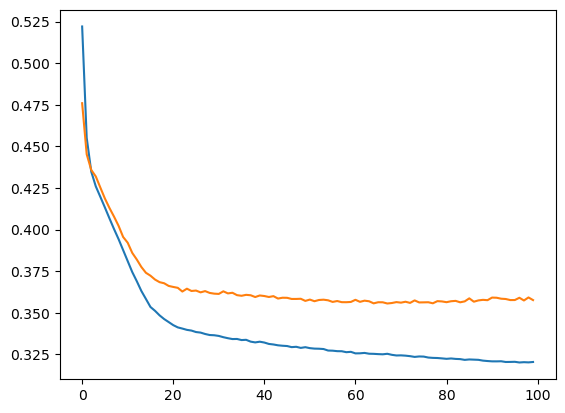

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

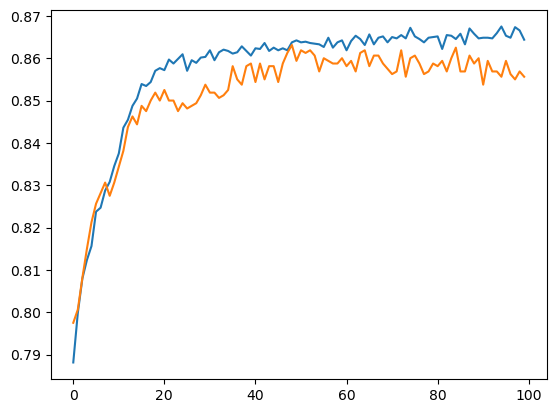

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])